In [31]:
import pandas as pd
import numpy as np
import sklearn.model_selection as skm
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from ISLP import confusion_table

In [13]:
#load the dataset
df = pd.read_csv('dataQTM.csv')

In [42]:
#create X and y, drop the empty column
y = df['diagnosis']
X = df.drop(['diagnosis', 'id', 'Unnamed: 32'], axis=1).astype('float64')

#split: trainning size 70% and testing size 30%
X_train, X_test, y_train, y_test = skm.train_test_split(X, y, train_size= 0.7, random_state=123)

#standardize the X_train and X_test
sd_train = StandardScaler(with_mean=True, with_std=True)
sd_train.fit(X_train)
X_train = sd_train.transform(X_train)

sd_test = StandardScaler(with_mean=True, with_std=True)
sd_test.fit(X_test)
X_test = sd_test.transform(X_test)

#define the range for n neighbors
param_grid = {'n_neighbors': range(1, 51)}

In [43]:
#use cross validation to find the best k
cv_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)
cv_knn.fit(X_train, y_train)
best_k = cv_knn.best_params_['n_neighbors']
best_k

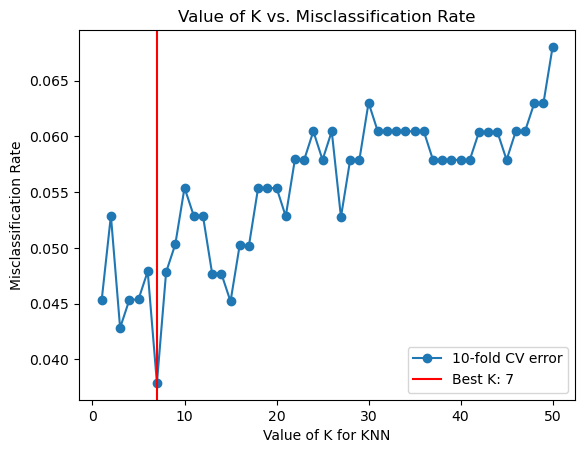

In [44]:
# calculate the misclassification rate for each k
param_values = list(param_grid['n_neighbors'])
cv_errors = [1 - score for score in cv_knn.cv_results_['mean_test_score']]

# plot the k vs misclassification rate
plt.plot(param_values, cv_errors, label='10-fold CV error', marker='o')
plt.axvline(x=best_k, color='red', label=f'Best K: {best_k}')
plt.xlabel('Value of K for KNN')
plt.ylabel('Misclassification Rate')
plt.title('Value of K vs. Misclassification Rate')
plt.legend()
plt.show()

In [45]:
#fit the knn model with k = 7 and calculate the misclassification
knn_best = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_test)
print(np.mean(y_pred_knn != y_test))

0.029239766081871343


In [32]:
#create a confusion table
confusion_table(y_pred_knn, y_test)

Truth,B,M
Predicted,,
B,102,4
M,1,64
